In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix


%matplotlib inline

In [5]:
sns.__version__

'0.9.0'

### Read in Images and Labels

In [6]:
pd_images = pd.read_csv("pd_images_label_adjust.csv")

In [7]:
pd_images.head()

,0,1,2,3,4,5,6,7,8,9,...,24794,24795,24796,24797,24798,24799,24800,24801,24802,24803
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [8]:
labels = pd.read_csv("labels_label_adjust.csv")

In [9]:
labels.head()

,label
0,1
1,1
2,1
3,1
4,1


In [10]:
labels.shape

(4452, 1)

### Class Balance Check

In [11]:
labels['label'].value_counts()

2    1916
3    1277
1    1259
Name: label, dtype: int64

In [12]:
labels['label'].value_counts()/4452

2    0.430368
3    0.286837
1    0.282794
Name: label, dtype: float64

In [13]:
pd_images.shape, labels.shape

((4452, 24804), (4452, 1))

### Normalize Data

In [14]:
# Use simple neural network to do supervised learning
pd_images_sc = pd_images / 255

In [15]:
from keras.utils.np_utils import to_categorical

categorical_labels = to_categorical(labels-1)

### Train test split and reshape

In [16]:
X_train, X_test, y_train, y_test = train_test_split(pd_images_sc, categorical_labels, random_state = 42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3339, 24804), (1113, 24804), (3339, 3), (1113, 3))

In [18]:
X_train_2d = np.array(X_train).reshape(X_train.shape[0], 78, 106, 3)
X_test_2d = np.array(X_test).reshape(X_test.shape[0], 78, 106, 3)

### Convolutional Neural Network Model 4

In [28]:
model_4 = Sequential()

model_4.add(Conv2D(filters = 6,          
                 kernel_size = 3,     
                 activation = 'relu',
                 input_shape = X_train_2d.shape[1:]))
            
model_4.add(MaxPooling2D(pool_size = (2,2)))
            
model_4.add(Conv2D(filters = 12,          
                 kernel_size = 6,     
                 activation = 'relu'))
            
model_4.add(MaxPooling2D(pool_size = (2,2)))

model_4.add(Dropout(rate = 0.5))
            
model_4.add(Flatten())
            
model_4.add(Dense(128, activation = 'relu'))

model_4.add(Dropout(rate = 0.5))

model_4.add(Dense(3, activation='softmax'))

model_4.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [29]:
history_4 = model_4.fit(x = X_train_2d,y = y_train, batch_size=32, epochs = 20, validation_data=(X_test_2d, y_test))

Train on 3339 samples, validate on 1113 samples
Epoch 1/20
3339/3339 [==============================] - 16s 5ms/step - loss: 0.7474 - acc: 0.6565 - val_loss: 0.6239 - val_acc: 0.7062
Epoch 2/20
3339/3339 [==============================] - 15s 5ms/step - loss: 0.6079 - acc: 0.7370 - val_loss: 0.5359 - val_acc: 0.7835
Epoch 3/20
3339/3339 [==============================] - 15s 5ms/step - loss: 0.5393 - acc: 0.7670 - val_loss: 0.5042 - val_acc: 0.7871
Epoch 4/20
3339/3339 [==============================] - 15s 5ms/step - loss: 0.5230 - acc: 0.7817 - val_loss: 0.4766 - val_acc: 0.8014
Epoch 5/20
3339/3339 [==============================] - 15s 5ms/step - loss: 0.4932 - acc: 0.7913 - val_loss: 0.4704 - val_acc: 0.8041
Epoch 6/20
3339/3339 [==============================] - 15s 5ms/step - loss: 0.4673 - acc: 0.8008 - val_loss: 0.4566 - val_acc: 0.8050
Epoch 7/20
3339/3339 [==============================] - 15s 5ms/step - loss: 0.4432 - acc: 0.8107 - val_loss: 0.4394 - val_acc: 0.8140
Epoch 8

### Result Analysis

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    print("\n")


In [31]:
def draw_confusion_matrix(model = model_4):
    # Define class names:
    class_names = ['Type 1', 'Type 2', 'Type 3']
    
    # Compute prediction
    pred = model.predict(np.array(X_test_2d))
    
    # Compute confusion matrix
    C = confusion_matrix([np.argmax(y) for y in y_test], [np.argmax(y) for y in pred])
    #np.set_printoptions(precision=1)


    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(C, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(C, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()



Confusion matrix, without normalization
[[209 124   2]
 [ 27 435  21]
 [  4  16 275]]


Normalized confusion matrix
[[0.6238806  0.37014925 0.00597015]
 [0.05590062 0.90062112 0.04347826]
 [0.01355932 0.05423729 0.93220339]]




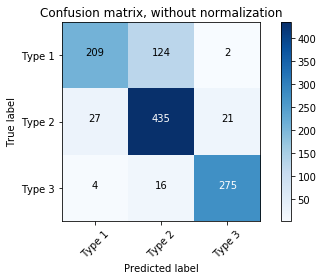

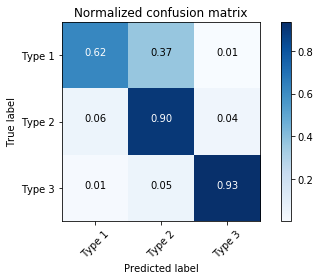

In [32]:
draw_confusion_matrix(model_4)

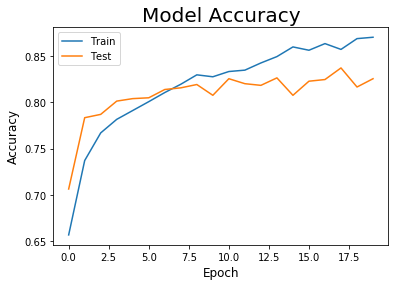

In [33]:
def plot_accuracy(history = history_4):
    ax = sns.lineplot(history.epoch, history.history['acc'], label="Train")
    sns.lineplot(history.epoch, history.history['val_acc'], label='Test')
    ax.axes.set_title("Model Accuracy", fontsize=20)
    ax.axes.set_xlabel("Epoch", fontsize =12)
    ax.axes.set_ylabel("Accuracy", fontsize=12)
    ax.axes.get_legend()

plot_accuracy(history_4)

In [ ]:
def plot_loss(history = history_4):
    ax = sns.lineplot(history.epoch, history.history['loss'], label='Train')
    sns.lineplot(history.epoch, history.history['val_loss'], label='Test')
    ax.axes.set_title("Model Loss", fontsize=20)
    ax.axes.set_xlabel("Epoch", fontsize =12)
    ax.axes.set_ylabel("Loss", fontsize=12)
    ax.axes.get_leg44end()

plot_loss(history_4)

### Convolutional Neural Network Model 3

In [19]:
model_3 = Sequential()

model_3.add(Conv2D(filters = 6,          
                 kernel_size = 3,     
                 activation = 'relu',
                 input_shape = X_train_2d.shape[1:]))
            
model_3.add(MaxPooling2D(pool_size = (2,2)))
            
model_3.add(Conv2D(filters = 12,          
                 kernel_size = 6,     
                 activation = 'relu'))
            
model_3.add(MaxPooling2D(pool_size = (2,2)))
            
model_3.add(Flatten())
            
model_3.add(Dense(128, activation = 'relu'))

model_3.add(Dense(3, activation='softmax'))

model_3.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [20]:
history_3 = model_3.fit(x=X_train_2d,y=y_train,batch_size=32, epochs = 10, validation_data=(X_test_2d, y_test))

Train on 3339 samples, validate on 1113 samples
Epoch 1/10
3339/3339 [==============================] - 49s 15ms/step - loss: 0.6977 - acc: 0.6867 - val_loss: 0.6043 - val_acc: 0.7260
Epoch 2/10
3339/3339 [==============================] - 33s 10ms/step - loss: 0.5259 - acc: 0.7766 - val_loss: 0.4788 - val_acc: 0.7871
Epoch 3/10
3339/3339 [==============================] - 15s 5ms/step - loss: 0.4807 - acc: 0.7951 - val_loss: 0.4632 - val_acc: 0.8149
Epoch 4/10
3339/3339 [==============================] - 15s 5ms/step - loss: 0.4458 - acc: 0.8137 - val_loss: 0.4470 - val_acc: 0.8032
Epoch 5/10
3339/3339 [==============================] - 15s 5ms/step - loss: 0.4058 - acc: 0.8341 - val_loss: 0.4477 - val_acc: 0.7880
Epoch 6/10
3339/3339 [==============================] - 15s 5ms/step - loss: 0.3739 - acc: 0.8488 - val_loss: 0.4255 - val_acc: 0.8293
Epoch 7/10
3339/3339 [==============================] - 15s 4ms/step - loss: 0.3450 - acc: 0.8613 - val_loss: 0.4079 - val_acc: 0.8365
Epoch

Confusion matrix, without normalization
[[262  72   1]
 [ 90 386   7]
 [  5  29 261]]


Normalized confusion matrix
[[0.78208955 0.21492537 0.00298507]
 [0.1863354  0.79917184 0.01449275]
 [0.01694915 0.09830508 0.88474576]]




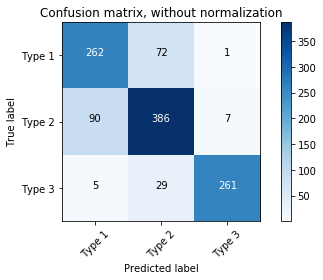

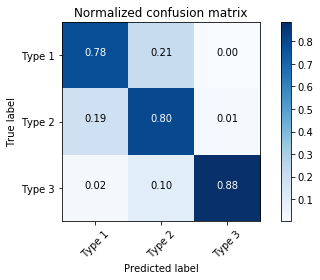

In [27]:
draw_confusion_matrix(model_3)

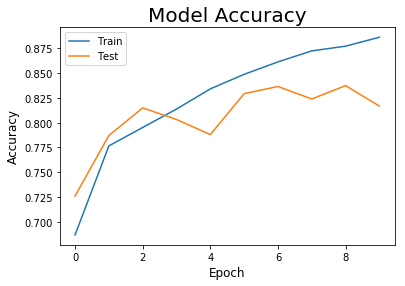

In [35]:
plot_accuracy(history_3)

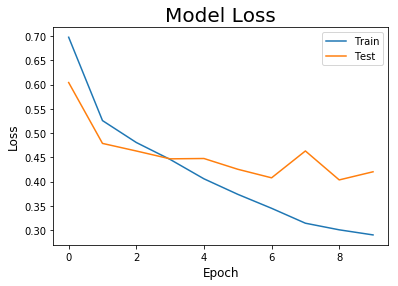

In [38]:
plot_loss(history_3)